# Nick Pelonis

# 1.) Pull in Data and Convert to Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# Adjusted Close
df["Diff"] = df['Adj Close'].diff().shift(-1)

In [4]:
# Target
df["Target"] = np.sign(df["Diff"])

In [5]:
# Premium
df['Premium'] = 0.08 * df['Adj Close']

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [7]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [8]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30",:].copy()

In [9]:
#y = y.drop('1980-12-31')

In [10]:
y

Date
1980-12-31   -1.0
1981-01-31   -1.0
1981-02-28   -1.0
1981-03-31    1.0
1981-04-30    1.0
             ... 
2023-05-31    1.0
2023-06-30    1.0
2023-07-31   -1.0
2023-08-31   -1.0
2023-09-30   -1.0
Freq: M, Name: Target, Length: 514, dtype: float64

In [11]:
#X = X.drop('1980-12-31')

In [12]:
X

,VAR1
Date,
1980-12-31,0.163261
1981-01-31,0.437449
1981-02-28,-0.334994
1981-03-31,2.550820
1981-04-30,3.170655
...,...
2023-05-31,2.330573
2023-06-30,3.033257
2023-07-31,1.007072


In [13]:
# Fit a log reg, won't be splitting into test and train for time

logreg = LogisticRegression()

logreg.fit(X,y)

LogisticRegression()

# 4.) Add columns, prediction and profits.

In [14]:
y_pred = logreg.predict(X)

In [15]:
df["Predictions"] = y_pred

In [16]:
df["Profits"] = 0.

In [17]:
df.loc[(df['Target'] ==1) & (df["Predictions"] ==1) & (df['Predictions'] ==1), "Profits"] = df["Premium"]

df.loc[(df['Target'] ==-1) & (df["Predictions"] ==1), "Profits"] = (100*df['Diff']+df['Premium'])

# 5.) Plot profits over time

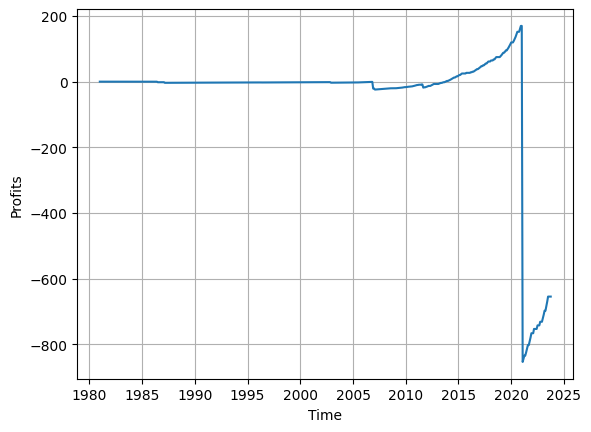

In [18]:
plt.plot(np.cumsum(df["Profits"]))
plt.grid()
plt.xlabel('Time')
plt.ylabel('Profits')
plt.show()

# 5.5.) Short write up about how you see your skills valuable to PJ (presenter at beginning) and/or Philip who is about to talk right now

PJ was speaking about his company which is similar to Nvidia or AMD in the way they deliver processors, AI, and cloud computing solutions to consumers and businesses. I feel my skills in coding and data science would add great value to a firm like this. As with any digitally based business, cloud computing involves large amounts of data. This data can be made sense of to recommend business strategy or changes in expenditure from the top of the corporation. This is why data science is a relatively new career field that has seen tremendous growth over the last decade; it is because tech overall is still a new field, and the firms that use data to their advantage leap ahead of the competition. 